# Predicción Univariada y Multivariada de los Principales Índices Financieros del Mundo

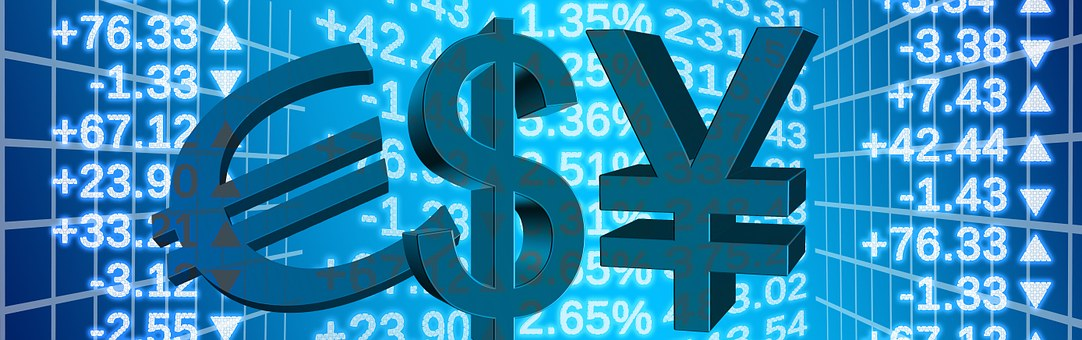

In [61]:
from IPython.display import Image
Image(filename='./img/imagenStock.jpg' ,  width= 1280)

# Trabajo Práctico N°2: Análisis Exploratorio y Curación de Datos

## Introducción

En este práctico se propone continuar con la exploración del dataset iniciada en el TP1. En lo desarrollado en el primer práctico pudimos notar algunas características propias de los datos de series temporales y en particular de los índices financieros. Algunas de ellas son que se trata de __series no estacionarias__, o sea que sus distribuciones cambian a través del tiempo y además sus trayectorias no son determinísticas sino que se trata de procesos con __raices unitarias__. __Tampoco se aprecian patrones de estacionalidad__. Lo antes descripto tiene __consecuencias__ directas en la selección de las metodologías adecuadas para abordar las problemáticas de tratamiento de __valores faltantes__, detección de __outliers__ y la construcción de __modelos predictivos y/o causales__.

Por otra parte, debe notarse que los índices son escencialmente promedios ponderados de los precios de los activos que los componen y a su vez que el precio de una acción sea mayor al de otra no significa directamente un mayor valor de la firma, dado que la cantidad de acciones emitidas por cada empresa no es la misma. Entonces, el análisis de este tipo de series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los índices originales, previamente se habitúa realizar una __transformación logarítmica__ o trabajar con la __tasa de rendimiento__. Además, los índices están expresados en distintas monedas, por lo que a la hora de comparar sus evoluciones o tasas de rendimiento es conveninete reexpresarlos en un __único signo monetario__ para evitar distorsiones debidas a los procesos inflacionarios, especialmente en el caso de las economías emergentes.

### Carga del dataset

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

In [63]:
df = pd.read_csv("./inputs/dataset.csv", index_col=0, parse_dates=True, dayfirst=True)

### Variables

- __FECHA__: se la usa como índice del _pandasDataFrame_.

#### Índices (Valores al cierre de cada día):

- __MERV__: Merval (Argentina). Expresado en pesos.
- __BVSPC__: Bovespa (Brasil). Expresado en reales.
- __GSPC__: Standard & Poors 500 (Estados Unidos). Expresado en dólares estadounidenses.
- __NDX__: Nasdaq 100 (Estados Unidos). Expresado en dólares americanos.
- __FTSE__: FTSE 100 (Reino Unido). Expresado en libras esterlinas.
- __GDAXI__: DAX 30 (Alemania). Expresado en euros.
- __FCHI__: CAC 40 (Francia). Expresado en euros.
- __N225__: Nikkei 225 (Japón). Expresado en yenes.
- __HSI__: Hang Seng (China). Expresado en dólares honkonenses.
- __SSEC__: Shanghai Composite (China). Expresado en yuanes.
- __BSESN__: Bombay Stock Exchange (India). Expresado en rupias indias.

#### Tipos de cambio:

- __DEXARUS__: cantidad de pesos necesarios para adquir un dólar estadounidense.
- __DEXBZUS__: cantidad de reales necesarios para adquir un dólar estadounidense.
- __DEXUSUK__: cantidad de dólares estadounidenses necesarios para adquir una libra esterlina.
- __DEXUSEU__: cantidad de dólares estadounidenses necesarios para adquir un euro.
- __DEXJPUS__: cantidad de yenes necesarios para adquir un dólar estadounidense.
- __DEXHKUS__: cantidad de dólares hongkonenses necesarios para adquir un dólar estadounidense.
- __DEXCHUS__: cantidad de yuanes chinos necesarios para adquirir un dólar estadounidense.
- __DOLAR_BLUE__: serie de dolar blue, que se puede usar para corregir __DEXARUS__ en épocas de cepo cambiario. Surge de la combinación de dos series, una para el período 28/10/2011 - 16/12/2015 y otra para el período 01/09/2019 - 08/05/2020.

# Consignas del trabajo práctico N°2

El objetivo general del práctico es realizar algunas tareas de __preprocesamiento__ de los datos y luego __analizar las series obtenidas__ de dicho preprocesamiento en forma similar a la empleada en el TP1.


## Fecha de entrega

- __Versión preliminar: 13/7__ 

- __Version final: 19/7__

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 


Se proponen las siguientes actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales:


#### Tratamiento de faltantes

- Eliminar los fines de semana.

In [64]:
df = df[df.index.dayofweek < 5]

- Imputar los faltantes debidos a feriados usando un algoritmo adecuado para series temporales, por ejemplo splines.

En lo que sigue, vamos a imputar los datos faltantes usando interpolanción lineal  e interpolación cúbica, la cual, como veremos a continuación, es más suave. Primero lo haremos para un índice en particular, el MERV.

In [65]:
df_merv = df[['MERV']]
df_merv['new_index'] = np.array(range(len(df_merv)))

In [66]:
df_merv_dropna=df_merv.dropna()

In [67]:
y = np.array(df_merv.MERV)
x = np.array(df_merv.new_index)

y_dropna = np.array(df_merv_dropna.MERV)
x_dropna = np.array(df_merv_dropna.new_index)

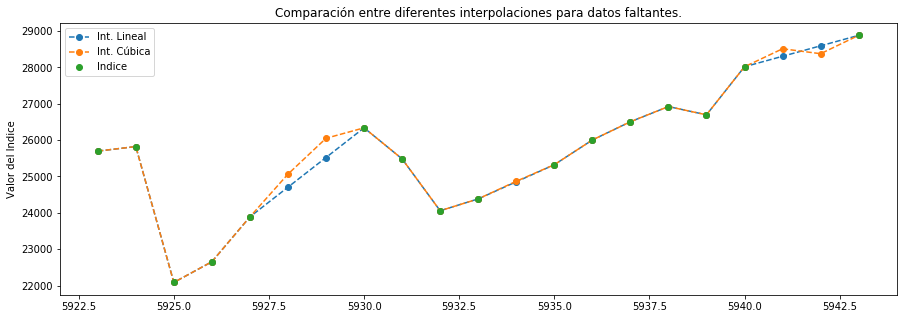

In [68]:
f_lineal = interp1d(x_dropna, y_dropna)
f_cubic = interp1d(x_dropna, y_dropna, kind='cubic')

y_lineal = f_lineal(x)
y_cubic = f_cubic(x)

x, y, y_lineal, y_cubic = x[-40:-19],y[-40:-19],y_lineal[-40:-19],y_cubic[-40:-19]

plt.plot(x,y_lineal, marker='o', ls = '--')
plt.plot(x,y_cubic, marker='o', ls = '--')
plt.plot(x,y, 'o')

plt.legend(['Int. Lineal', 'Int. Cúbica','Indice'], loc='best')
plt.title('Comparación entre diferentes interpolaciones para datos faltantes.')
plt.ylabel('Valor del Indice')
plt.show()

Como podemos ver de este pequeño ejemplo, entendemos que es más realista utilizar interpolación cúbica en lugar de lineal. A continuación realizaremos este tratamiento en todas las columnas de nuestro df. 

In [69]:
df_interpolate = df.copy()

for col in df.columns:
    
    df_temp = df[[col]]
    df_temp['new_index'] = np.array(range(len(df_temp)))
    
    df_temp_dropna=df_temp.dropna()

    y = np.array(df_temp[col])
    x = np.array(df_temp.new_index)

    y_dropna = np.array(df_temp_dropna[col])
    x_dropna = np.array(df_temp_dropna.new_index)
    
    f_lineal = interp1d(x_dropna, y_dropna, fill_value="extrapolate")
    f_cubic = interp1d(x_dropna, y_dropna, kind='cubic', fill_value="extrapolate")

    y_lineal = f_lineal(x)
    y_cubic = f_cubic(x)
    
    df_interpolate[col] = y_cubic
    del df_temp, df_temp_dropna, x, y, x_dropna, y_dropna, f_lineal, f_cubic, y_lineal, y_cubic

In [70]:
df = df_interpolate.copy()

- Ver como tratar las columnas que empiezan con NaN como HSI y DOLAR_BLUE

Cuando calculamos la interpolación de los datos, en el item anterior, utilizamos la opción de extrapolar los datos, esto nos permite darle valores a los series que comienzan o terminan con NaN. 

#### Expresión en moneda común:

- Construir una serie corregida para el tipo de cambio de Argentina. Para ello se deberá sobreescribir las cotizaciones oficiales con los valores del _DOLAR_BLUE_ en los períodos de cepo cambiario, o sea 28/10/2011 - 16/12/2015 y  01/09/2019 - 08/05/2020.

In [71]:
cepo_1 = (df.index >= '2011-10-28') & (df.index <= '2015-12-16')
cepo_2 = (df.index >= '2019-09-01') & (df.index <= '2020-05-08')
cepo = (cepo_1 | cepo_2)
df['DEXARUS'][cepo] = df['DOLAR_BLUE']

- Expresar todos los índices en dólares estadounidenses.

In [72]:
df_us = pd.DataFrame(index=df.index)
df_us['MERV'] = df['MERV'] / df['DEXARUS'] # Divido porque el par esta en X/US
df_us['BVSP'] = df['BVSP'] / df['DEXBZUS']
df_us['FTSE'] = df['FTSE'] * df['DEXUSUK'] # Multiplico porque el par esta en US/X
df_us['GDAXI'] = df['GDAXI'] * df['DEXUSEU']
df_us['FCHI'] = df['FCHI'] * df['DEXUSEU']
df_us['N225'] = df['N225'] / df['DEXJPUS']
df_us['HSI'] = df['HSI'] / df['DEXHKUS']
df_us['SSEC'] = df['SSEC'] / df['DEXCHUS']
# df_us['BSESNUS'] = df['BSESN'] / df['DEX?'] Falta el DEX de rupias indias? 

In [112]:
#A continuación agregamos los índices GSPC y NDX.
df_us['GSPC'] = df['GSPC']
df_us['NDX'] = df['NDX']

Text(0.5, 1.0, 'Evoluvión de los índices a través del tiempo.')

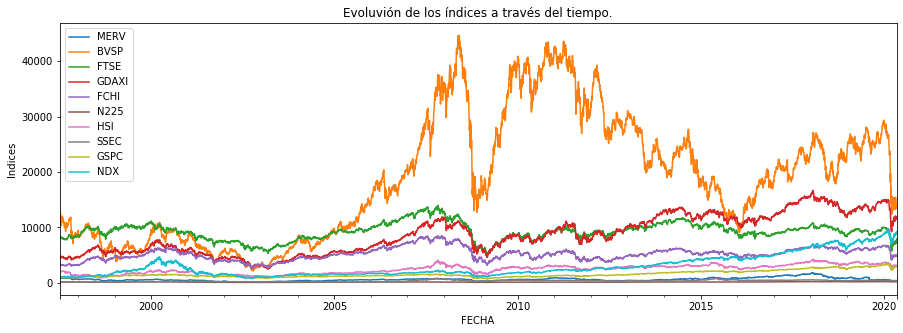

In [113]:
df_us.plot();
plt.ylabel('Indices')
plt.title('Evoluvión de los índices a través del tiempo.')

#### Transformaciones

Obtener las siguientes series transformadas:

- Los logaritmos naturales de los índices. 


Text(0.5, 1.0, 'Evoluvión de los índices a través del tiempo.')

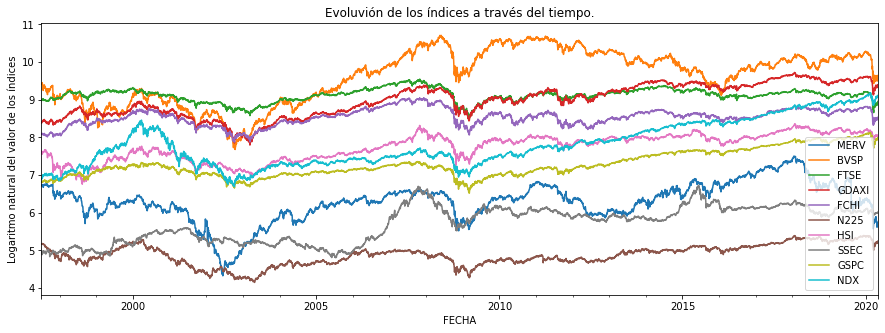

In [114]:
np.log(df_us).plot();
plt.ylabel('Logaritmo natural del valor de los índices')
plt.title('Evoluvión de los índices a través del tiempo.')

Para una mejor visualización de los índices, los inicializaremos en 1. 

Text(0.5, 1.0, 'Evoluvión de los índices a través del tiempo.')

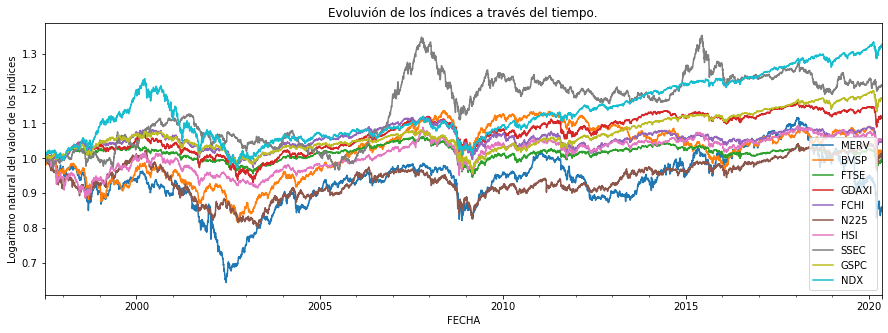

In [115]:
(np.log(df_us)/np.log(df_us.iloc[0])).plot()
plt.ylabel('Logaritmo natural del valor de los índices')
plt.title('Evoluvión de los índices a través del tiempo.')

- Las tasas de rendimiento.

Tasa de rendimiento del índice MERV.


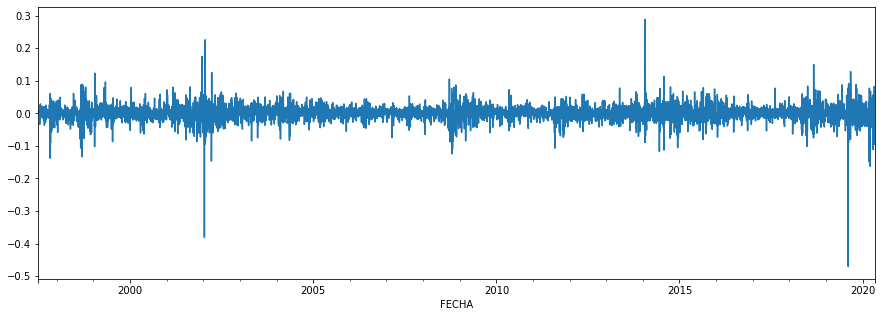

Tasa de rendimiento del índice BVSP.


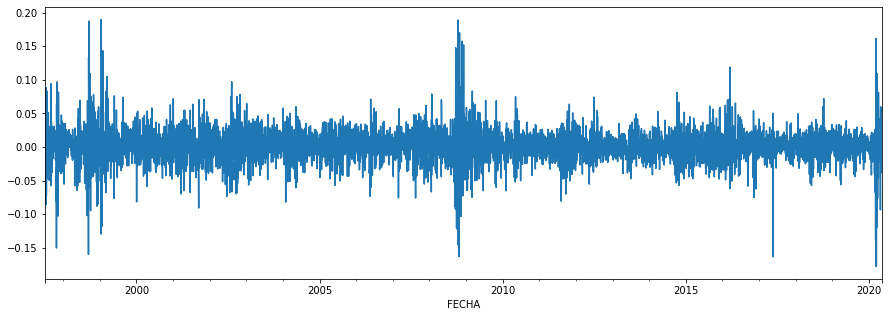

Tasa de rendimiento del índice FTSE.


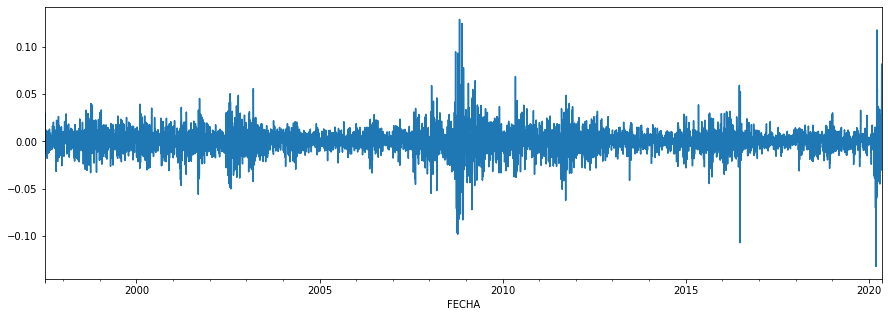

Tasa de rendimiento del índice GDAXI.


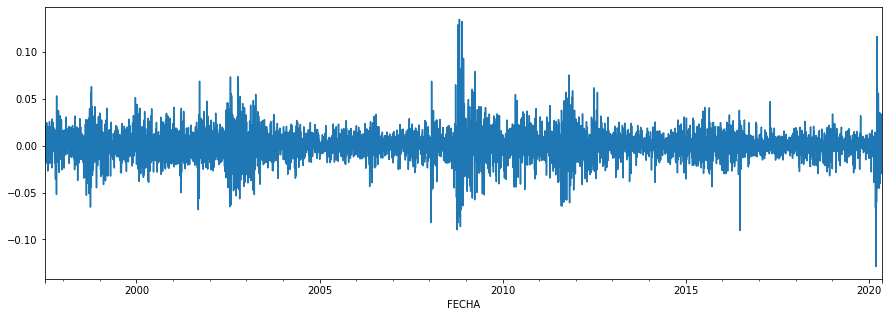

Tasa de rendimiento del índice FCHI.


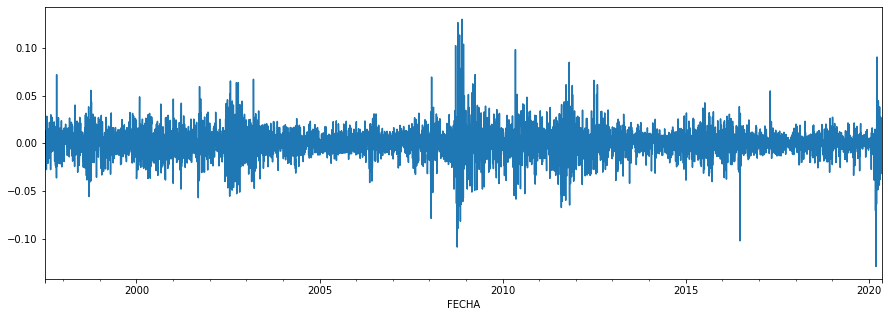

Tasa de rendimiento del índice N225.


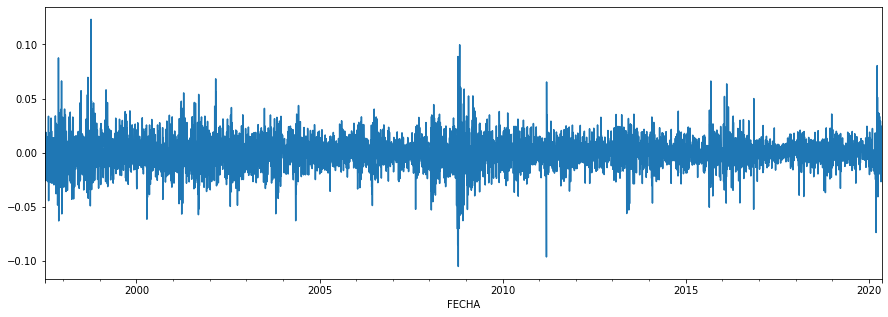

Tasa de rendimiento del índice HSI.


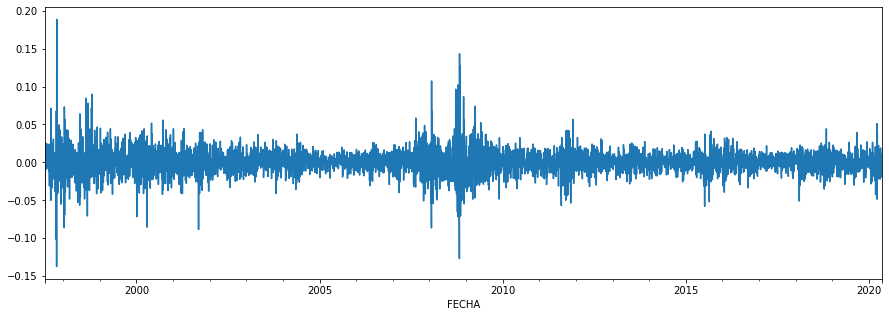

Tasa de rendimiento del índice SSEC.


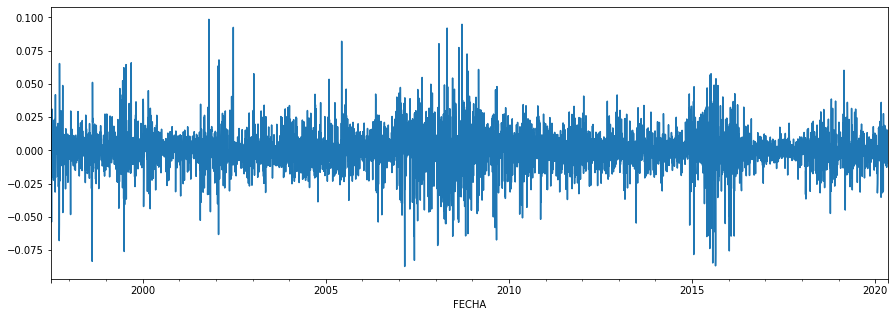

Tasa de rendimiento del índice GSPC.


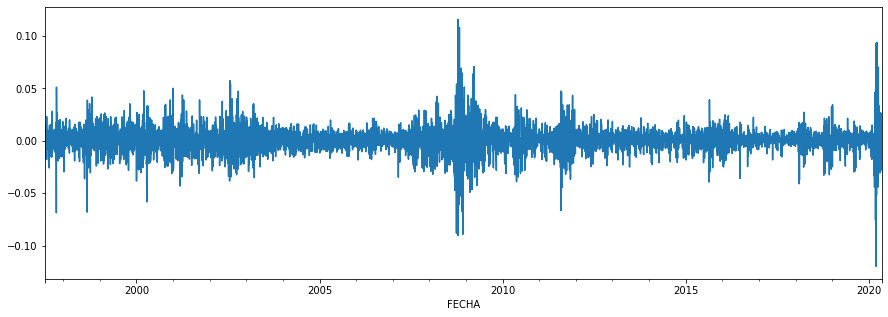

Tasa de rendimiento del índice NDX.


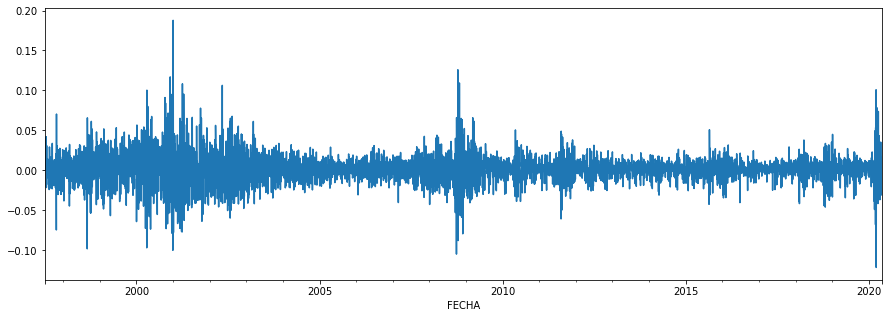

In [116]:
for col in df_us.columns:
    print('Tasa de rendimiento del índice {}.'.format(col))
    df_us[col].pct_change().replace(np.nan,0).plot()
    plt.show()

#### Exploración de las series transformadas

Reutilizar parte del código del TP1 para analizar las series transformadas. En una primera etapa se puede trabajar con solo una de las series resultantes de tomar logaritmo natural y una serie de tasa de rendimiento.

- Analizar las distribuciones por medio de gráficos y medidas de estadística descriptiva.



 MERV 

MEDIA:  6.29
VARIANZA:  0.27
COEF. DE VARIACION:  0.083 => 8.3 %
INDICE DE SIMETRÍA DE PEARSON: -0.18
COEF. DE CURTOSIS: 1.49

 FTSE 

MEDIA:  9.12
VARIANZA:  0.03
COEF. DE VARIACION:  0.0189 => 1.89 %
INDICE DE SIMETRÍA DE PEARSON: -0.35
COEF. DE CURTOSIS: 0.52


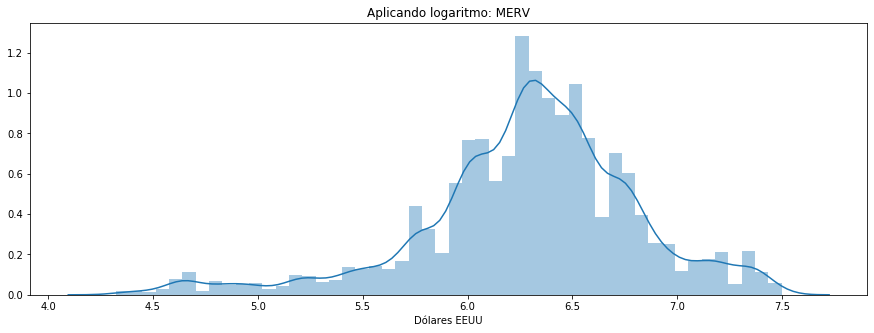

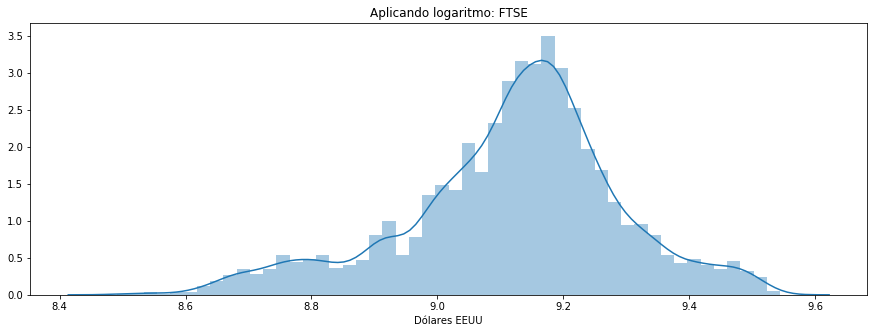

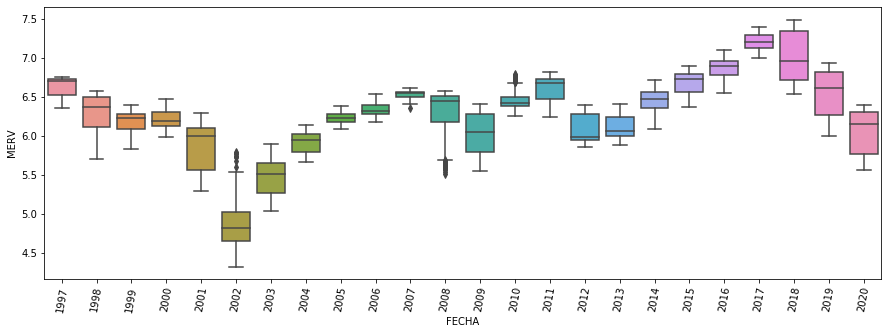

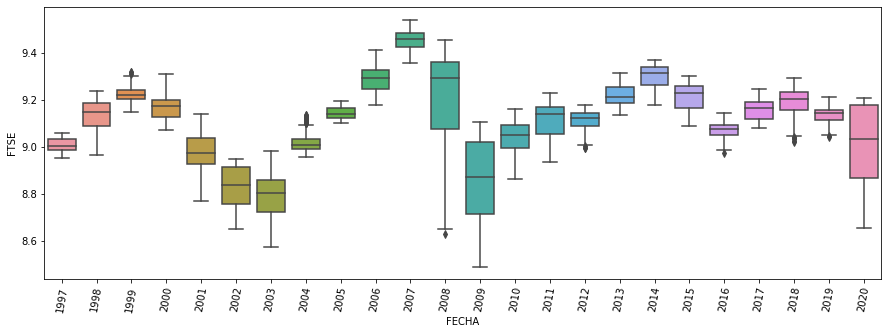

In [117]:
# Primero trabajo con las series resultantes de aplicar logaritmo
series_log = np.log(df_us)
selected_cols = ["MERV", "FTSE"] #Elijo para comparar Arg vs UK

# Estadistica descriptiva
for col in selected_cols:
    print('\n',col,'\n')
    mean = series_log[col].mean()
    median = series_log[col].median()
    var = series_log[col].var()
    std = series_log[col].std()
    coef = std/mean
    indice_simetria_pearson = 3*(mean - median)/std
    coef_curtosis = series_log[col].kurt()
    
    print('MEDIA: ', round(mean,2))
    print('VARIANZA: ', round(var,2))
    print('COEF. DE VARIACION: ', round(coef,4), '=>', round(coef * 100,2), '%')
    print('INDICE DE SIMETRÍA DE PEARSON:', round(indice_simetria_pearson,2))
    print('COEF. DE CURTOSIS:', round(coef_curtosis,2))
    
# Analisis de las distribuciones
year_range = df.index.year.max() - df.index.year.min()
for col in selected_cols:
    sns.distplot(series_log[col].dropna())
    plt.xlabel("Dólares EEUU")
    plt.title("Aplicando logaritmo: "+col)
    plt.show()

# Analisis de las distribuciones por año
for col in selected_cols:
    sns.boxplot(data=series_log, x=df.index.year, y=col)
    plt.xticks(rotation=80)
    plt.show()


 MERV 

MEDIA:  0.00017
VARIANZA:  0.00062
COEF. DE VARIACION:  149.1572 => 14915.72 %
INDICE DE SIMETRÍA DE PEARSON: -0.06
COEF. DE CURTOSIS: 37.62

 FTSE 

MEDIA:  9e-05
VARIANZA:  0.00018
COEF. DE VARIACION:  149.2645 => 14926.45 %
INDICE DE SIMETRÍA DE PEARSON: -0.09
COEF. DE CURTOSIS: 11.23


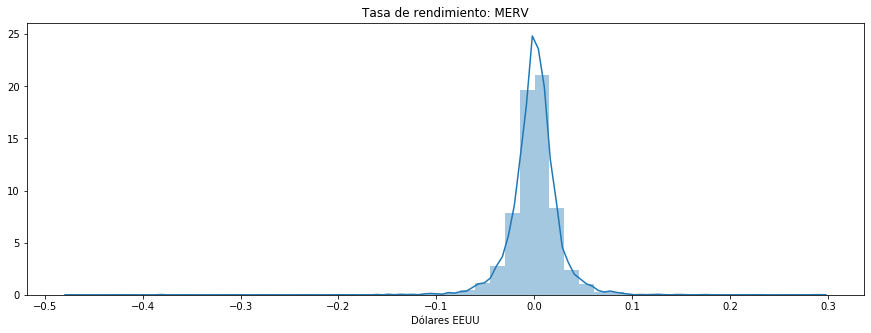

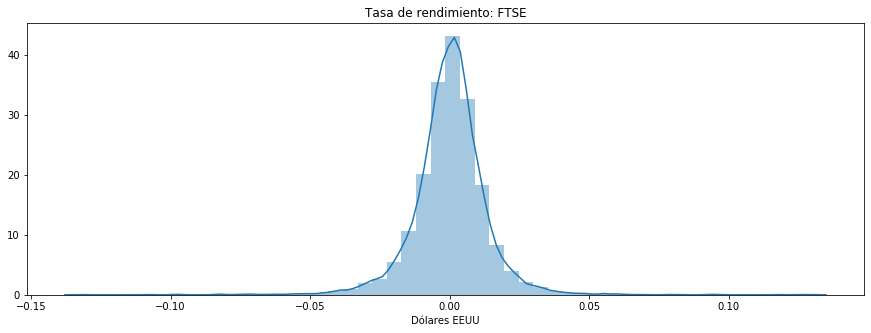

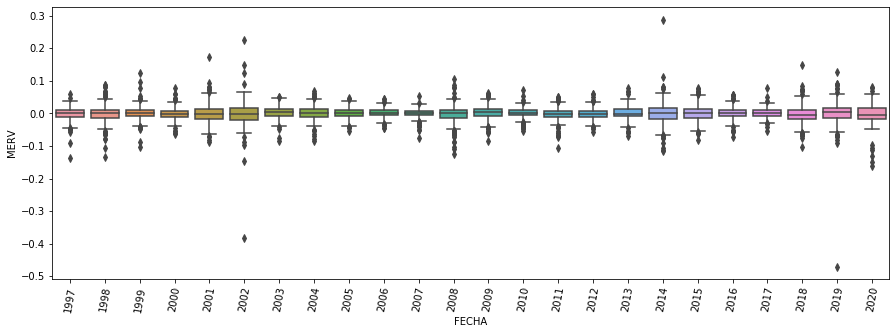

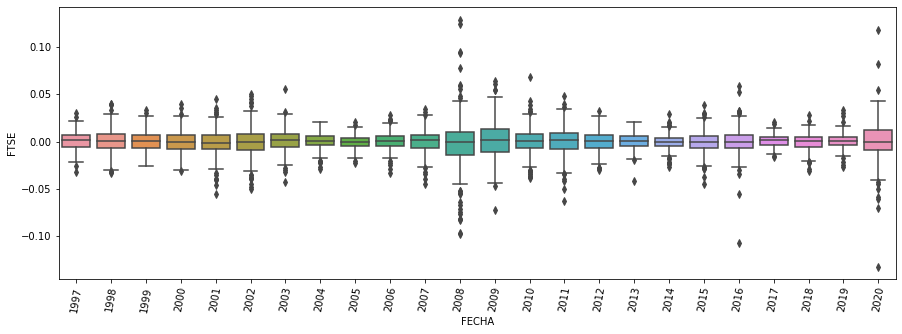

In [118]:
# Luego trabajo con las tasas de rendimiento
tasa_rend = df_us.pct_change().replace(np.nan,0)
selected_cols = ["MERV", "FTSE"] #Elijo para comparar Arg vs UK

# Estadistica descriptiva
for col in selected_cols:
    print('\n',col,'\n')
    mean = tasa_rend[col].mean()
    median = tasa_rend[col].median()
    var = tasa_rend[col].var()
    std = tasa_rend[col].std()
    coef = std/mean
    indice_simetria_pearson = 3*(mean - median)/std
    coef_curtosis = tasa_rend[col].kurt()
    
    print('MEDIA: ', round(mean,5))
    print('VARIANZA: ', round(var,5))
    print('COEF. DE VARIACION: ', round(coef,4), '=>', round(coef * 100,2), '%')
    print('INDICE DE SIMETRÍA DE PEARSON:', round(indice_simetria_pearson,2))
    print('COEF. DE CURTOSIS:', round(coef_curtosis,2))
    
# Analisis de las distribuciones
year_range = df.index.year.max() - df.index.year.min()
for col in selected_cols:
    sns.distplot(tasa_rend[col].dropna())
    plt.xlabel("Dólares EEUU")
    plt.title("Tasa de rendimiento: "+col)
    plt.show()

# Analisis de las distribuciones por año
for col in selected_cols:
    sns.boxplot(data=tasa_rend, x=df.index.year, y=col)
    plt.xticks(rotation=80)
    plt.show()

- Dichas distribuciones, ¿se mantienen relativamente inalteradas en el tiempo?

Podemos ver que las distribuciones **fluctúan a lo largo del tiempo**, hipótesis que venimos manejando desde el principio de este TP. Este fenómeno es posible verlo en el gráfico de boxplots a lo largo de los años calculado sobre las series resultantes de aplicar logaritmo natural.

Al aplicar la segunda transformación (tasa de rendimiento), vemos que la distribución se mantiene mucho más inalterada a lo largo de los años, pero en este segundo caso observamos muchos más outliers.

- ¿Hay outliers?


Sí, es posible apreciar outliers en el gráfico de los boxplots a lo largo de los años.

- Estudiar la evolución temporal de las series. ¿En qué sentido tienden a moverse? ¿Tienden a moverse en forma conjunta?  ¿Siempre se da dicho patrón? ¿Hay períodos de crisis? En caso de que existan crisis, ¿Son globales o propias de mercados individuales? 


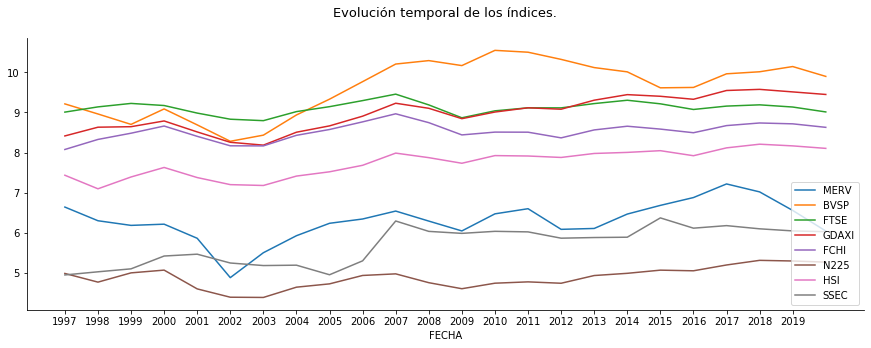

In [119]:
selected_indexes = ['MERV','BVSP','FTSE','GDAXI','FCHI','N225','HSI','SSEC']
data = series_log[selected_indexes]
new_data = data.groupby(df.index.year).mean()
ax = sns.lineplot(data=new_data, hue= ['MERV','BVSP','FTSE','GDAXI','FCHI','N225','HSI','SSEC'], dashes=False)
ax.set_xticks(np.arange(data.index.year.min(), data.index.year.max(), step=1))
sns.despine()
plt.title("Evolución temporal de los índices.\n", fontdict={'fontsize': 13})
plt.show()


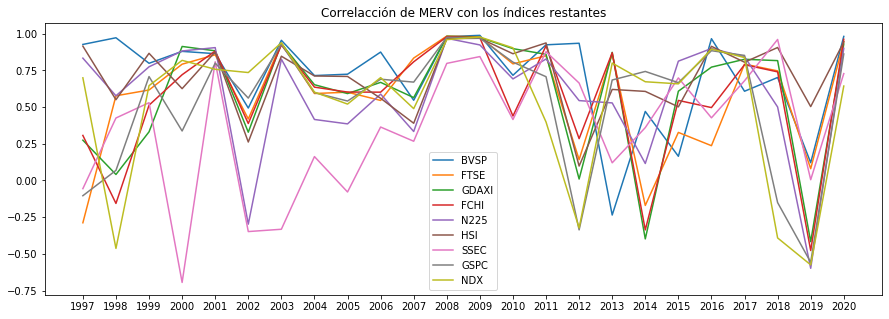

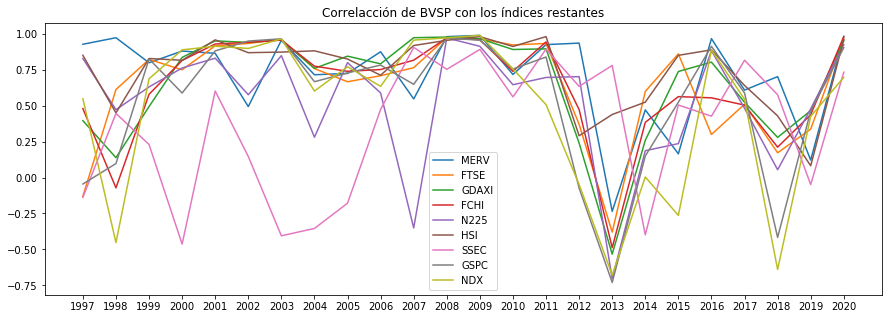

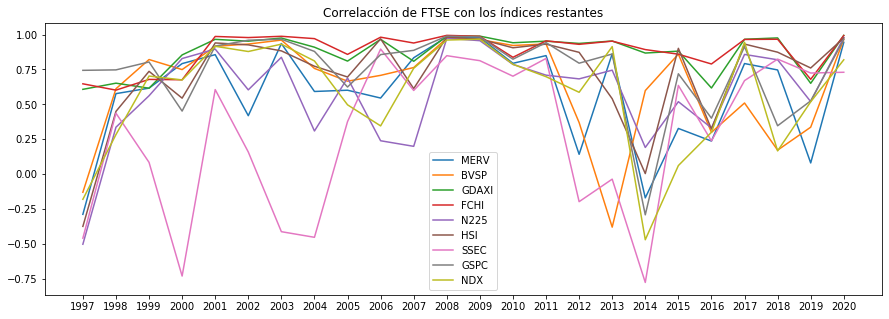

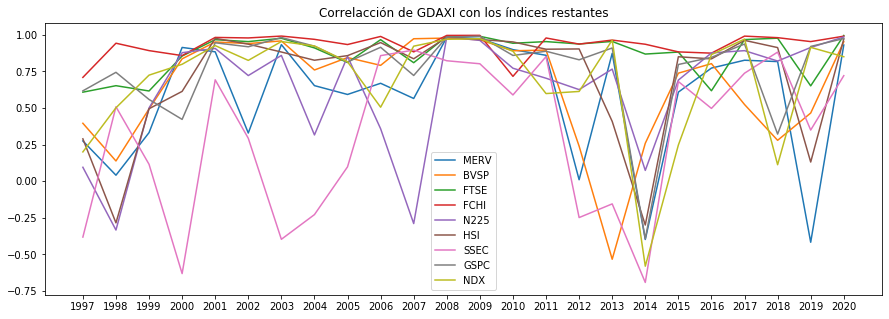

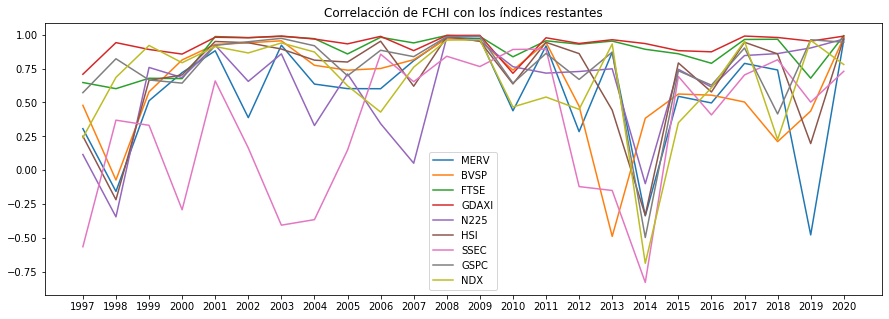

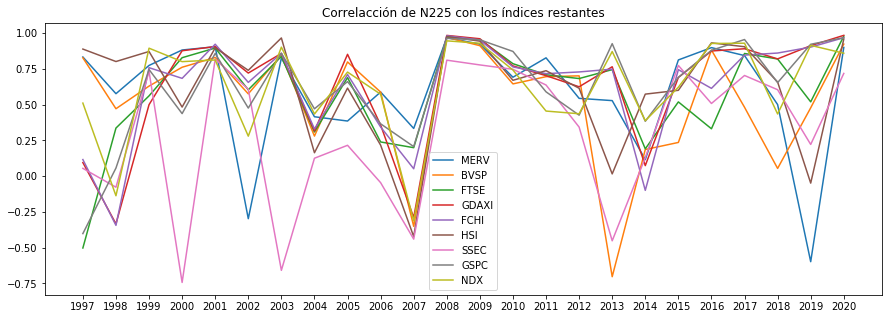

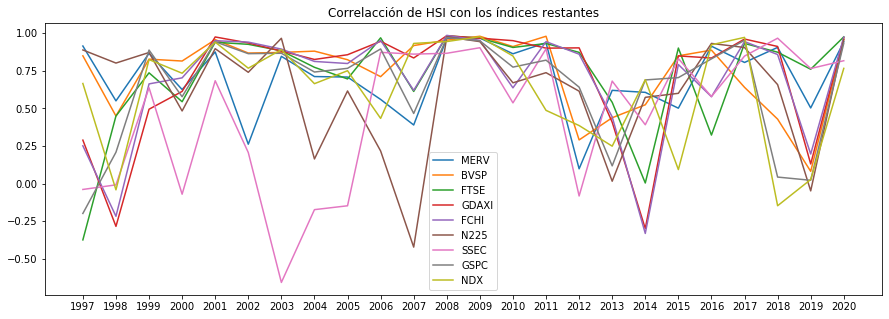

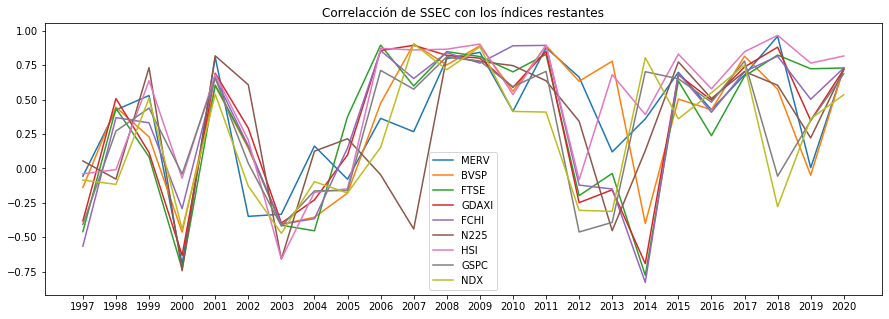

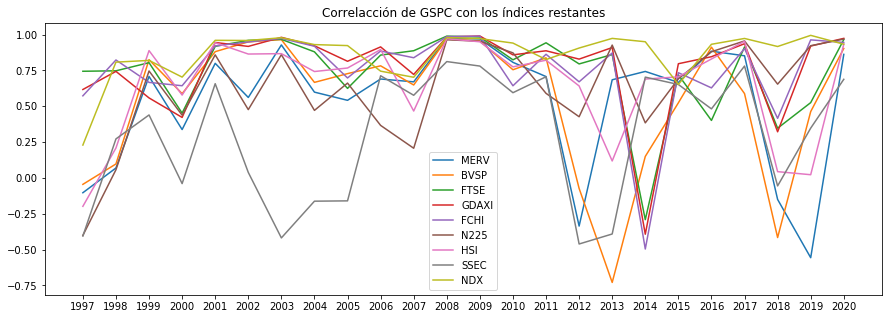

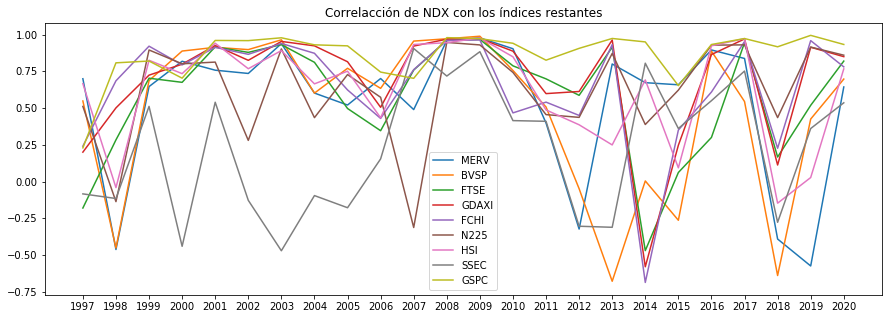

In [120]:
# Estudio de la correlacion para ver si son crisis globales o locales
df = series_log

years = [year for year in df.index.year.unique()]
for index in df.columns:
    aux = pd.DataFrame()    
    for index_ in df.columns.drop(index):
        list_corr = []
        for year in df.index.year.unique():
            corr = df[[index, index_]][df[[index, index_]].index.year == year].corr().iloc[0,1]
            list_corr.append(corr)
            
        aux['{}'.format(index_)] = list_corr
    ax = aux.plot(xticks=range(24))
    ax.set_xticklabels(years)
    plt.title('Correlacción de {} con los índices restantes'.format(index))
    del aux
    plt.show()

- Crisis: Podemos ver que en el 2008-2009 sufrimos una crisis global. Todos los países sufren una decaída abrupta este año y en análisis de correlación vemos que todos están juntos, eso significa que afectó a todos.

- Crisis en Argentina: En los años 2002 y 2019, sufrimos una crisis local en nuestro país. Puede verse claramente en el gráfico de correlación que nos despegamos de los demás países.

- Evolución temporal de las series: Vemos que en la mayoría de los países hay una pequeña tendencia a aumentar el valor de su índice. Se podría trazar una débil pendiente positiva entre los valores final e inicial de nuestros datos. En el caso de Argentina, vemos que en los últimos años el valor del índice MERV tiende a decrecer fuertemente (pendiente negativa a partir de 2017).

A continuación veremos la distribución de la tasa de rendimiento del mercado MERV vs. SSEC y FTSE, en los años 2001/2002, donde, como ya se mencionó, Argentina sufrió una crisis local.

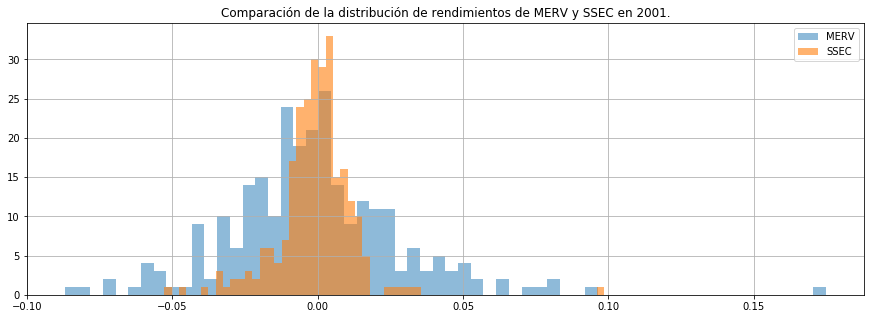

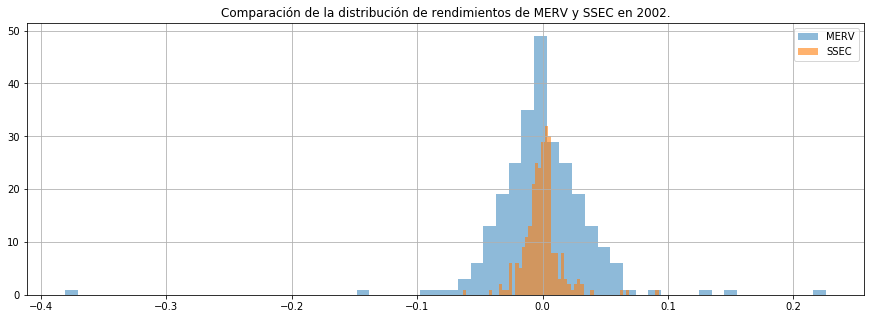

In [138]:
tasa_rend[tasa_rend.index.year ==2001].MERV.hist(bins = 60, alpha = 0.5, label = 'MERV')
tasa_rend[tasa_rend.index.year ==2001].SSEC.hist(bins = 60, alpha = 0.6, label = 'SSEC')
plt.title('Comparación de la distribución de rendimientos de MERV y SSEC en 2001.')
plt.legend()
plt.show()

tasa_rend[tasa_rend.index.year ==2002].MERV.hist(bins = 60, alpha = 0.5, label = 'MERV')
tasa_rend[tasa_rend.index.year ==2002].SSEC.hist(bins = 60, alpha = 0.6, label = 'SSEC')
plt.title('Comparación de la distribución de rendimientos de MERV y SSEC en 2002.')

plt.legend()

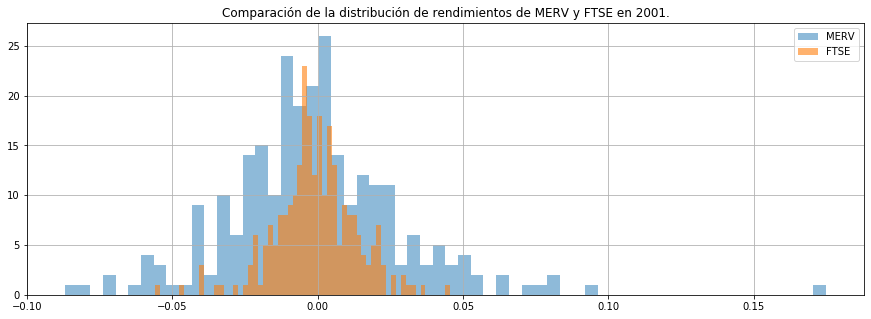

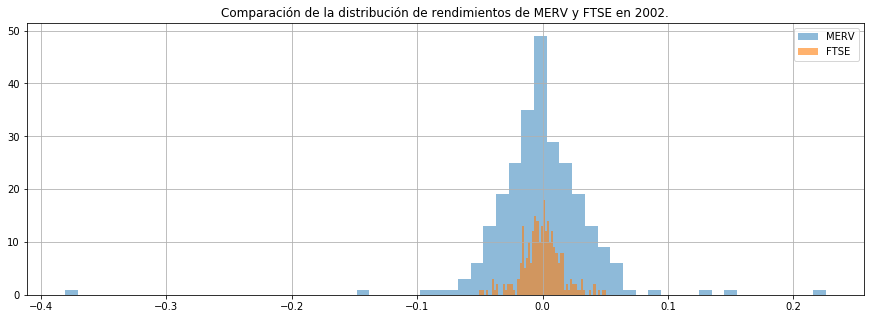

In [139]:
tasa_rend[tasa_rend.index.year ==2001].MERV.hist(bins = 60, alpha = 0.5, label = 'MERV')
tasa_rend[tasa_rend.index.year ==2001].FTSE.hist(bins = 60, alpha = 0.6, label = 'FTSE')
plt.title('Comparación de la distribución de rendimientos de MERV y FTSE en 2001.')
plt.legend()
plt.show()

tasa_rend[tasa_rend.index.year ==2002].MERV.hist(bins = 60, alpha = 0.5, label = 'MERV')
tasa_rend[tasa_rend.index.year ==2002].FTSE.hist(bins = 60, alpha = 0.6, label = 'FTSE')
plt.title('Comparación de la distribución de rendimientos de MERV y FTSE en 2002.')
plt.legend()

Como puede verse, para ambos años, vemos que las colas de las distribuciones para MERV son más pesadas y visualizamos algunos valores altos de rendimiento, en valor absoluto. En el año 2002, podemos ver una marcada diferencia entre las distribuciones de MERV vs los otros. Esto se debe a que en época de crisis, los movimientos de los índices son más bruscos.

#### Opcional

- Graficar e interpretar las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).


- Explorar la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.
